# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Df

0.4 Defining styles and labels formats

0.5 Random sampling of 30% of data

0.6 Exploration of senior_citizen profile

    0.6.1 importance of this profile
            A. count of users
            B. gross sales (total_spent_in_lifetime)
            C. total items (total_items_in_lifetime)
            D. per order stats
    
    0.6.2. demographics of this profile
            A. income
            B. income_group
            C. gender
            D. region
            E. fam_status
            F. n_dependants
            G. pet_owner
    
    0.6.2  what we know about their shopping habits
            A. loyalty_flag (based on max_order)
            B. low_activity_flag
            C. spender_type (based on mean_spending)
            D. frequent_shopper (based on median_days_since_ordering)
            E. day_of_the_week
            F. time_of_day
            G. most popular departments by number of items
            H. most popular departments by amount spent
   


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [ ]:
df.isnull().sum()

All nulls have been previously accounted for and labeled appropriately with flags.

In [ ]:
dept_data.shape

In [ ]:
dept_data.info()

In [ ]:
dept_data.head()

In [ ]:
dept_data.isnull().sum()

### 0.4 Defining styles and label formats

In [ ]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [ ]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [ ]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [ ]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [ ]:
# Define colors dark grey and forest green for plots
# colors = ['A9A9A9', '228B22']

In [ ]:
# Identifying which profile we are investigating
profile = 'two_parent_fam'
profile_label = 'Two Parent Families'
not_profile_label = 'Other Users'
labels = ['Two Parent Families', 'Other Users']
labels_r = ['Other Users', 'Two Parent Families']

### 0.5 Creating a subset df with each row = 1 user and profile flag

In [ ]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [ ]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [ ]:
df_user_subset.head()

In [ ]:
df_user_subset.shape

This has the same number of rows as the original df and only the 20 subsetted columns.

In [ ]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [ ]:
# Checking new shape
df_user_subset.shape

In [ ]:
df_user_subset.head()

Now we have a dataframe that reflects the users specifically.

In [ ]:
df_user_subset.loc[df_user_subset[profile] == True, 'profile_flag'] = profile_label
df_user_subset.loc[df_user_subset[profile] == False, 'profile_flag'] = not_profile_label
    

In [ ]:
df_user_subset.head()

## 0.6. Exploration of two_parent_fam profile

### 0.6.1 importance of this profile

#### 0.6.1.A  count of users

In [28]:
# Create a temporary df to hold the count of the profile
num_profile = df_user_subset['profile_flag'].value_counts()

In [29]:
num_profile

Two Parent Families    144906
Other Users             61303
Name: profile_flag, dtype: int64

Roughly 70.3% of our customer base are senior citizens.  This is almost three quarters.  (144,906/206,209=0.2654) 

In [30]:
# Reset the index so that the correct column headers will appear
num_profile = pd.DataFrame(num_profile).reset_index()

In [31]:
num_profile

,index,profile_flag
0,Two Parent Families,144906
1,Other Users,61303


In [32]:
# Set the index to be the boolean column with a header of 'index'
num_profile.set_index('index')

,profile_flag
index,
Two Parent Families,144906
Other Users,61303


Text(0.5, 1.0, '70% of our households are two-parent families.')

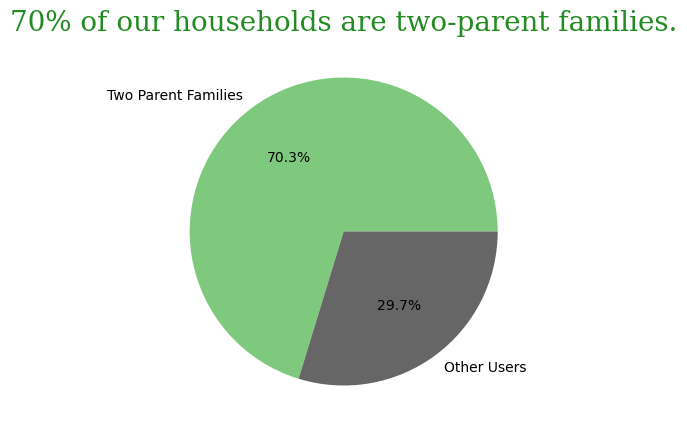

In [33]:
plot = num_profile.plot.pie(y='profile_flag', 
                            figsize=(7,5), 
                            counterclock=True, 
                            colormap='Accent', 
                            legend=False, 
                            labels = labels, 
                            autopct='%1.1f%%')
plt.ylabel('')

plt.title ("70% of our households are two-parent families.", 
           fontdict = font_title)


In [34]:
# Create filename for export
filename = profile+'_pie.png'

In [35]:
filename

'two_parent_fam_pie.png'

In [36]:
# Exporting bar chart
plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [37]:
# Reclaiming space
del num_profile

#### 0.6.1.B  gross sales (total_spent_in_lifetime)

In [38]:
# Calculate the gross sales for those in the profile and out of it
gross_sales_profile = df_user_subset.groupby('profile_flag').total_spent_in_lifetime.sum()

In [39]:
gross_sales_profile

profile_flag
Other Users            75,162,232.00
Two Parent Families   177,256,144.00
Name: total_spent_in_lifetime, dtype: float32

Seniors account for roughly 26.5% of gross sales.

In [40]:
# Reset the index so that the correct column headers will appear
gross_sales_profile = pd.DataFrame(gross_sales_profile).reset_index()

In [41]:
gross_sales_profile

,profile_flag,total_spent_in_lifetime
0,Other Users,"75,162,232.00"
1,Two Parent Families,"177,256,144.00"


In [42]:
# Swap the order of the rows so that the pie chart renders correctly
temp = pd.DataFrame()
temp = gross_sales_profile.copy()

In [43]:
temp

,profile_flag,total_spent_in_lifetime
0,Other Users,"75,162,232.00"
1,Two Parent Families,"177,256,144.00"


In [44]:
gross_sales_profile.iloc[0] = temp.iloc[1].copy()
gross_sales_profile.iloc[1] = temp.iloc[0].copy()

In [45]:
# Confirming the swap happened correctly
gross_sales_profile

,profile_flag,total_spent_in_lifetime
0,Two Parent Families,"177,256,144.00"
1,Other Users,"75,162,232.00"


Text(0.5, 1.0, 'Two-parent families also account for 70% of sales.')

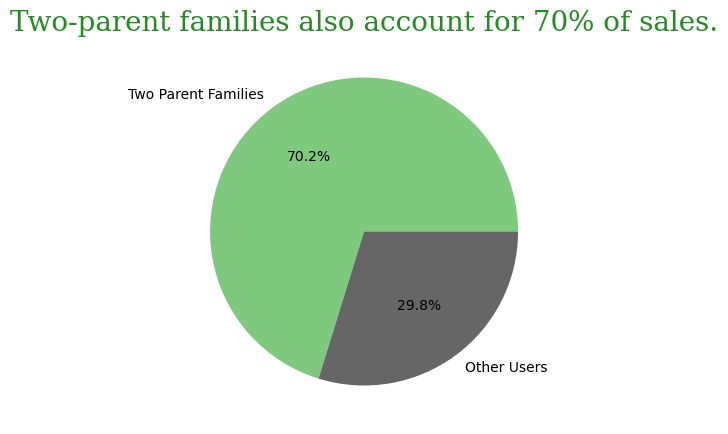

In [47]:
plot = gross_sales_profile.plot.pie(y='total_spent_in_lifetime', 
                                    figsize=(7,5), 
                                    counterclock=True, 
                                    colormap='Accent', 
                                    legend=False, 
                                    labels = labels, 
                                    autopct='%1.1f%%')
plt.ylabel('')

plt.title ("Two-parent families also account for 70% of sales.", 
           fontdict = font_title)


Since this isn't significantly different from what is expected, I'm not going to export it at this time. 

In [48]:
# Reclaiming space
del gross_sales_profile
del temp

#### 0.6.1.C  total items (total_items_in_lifetime)

In [49]:
# Calculate the total items for those in the profile and out of it
total_items = df_user_subset.groupby(profile).total_items_in_lifetime.sum()

In [50]:
total_items

two_parent_fam
False     9657428
True     22777061
Name: total_items_in_lifetime, dtype: int32

Two parent families also purchase 70% of all items.  Since this is not significantly different from the gross sales, we won't make a visual of it.

In [51]:
#Reclaiming space
del total_items

#### 0.6.1.D per order stats

In [52]:
# Calculate the avg_items_per_order for those in the profile and out of it
size_of_orders = df_user_subset.groupby(profile).avg_items_per_order_by_user.mean()

In [53]:
size_of_orders

two_parent_fam
False   9.93
True    9.96
Name: avg_items_per_order_by_user, dtype: float16

There is not a significant difference in the average size of orders between the profile group and not-profile group, so we will not create a visualization for this.

In [54]:
#Reclaiming space
del size_of_orders

### 0.6.2 demographics of this profile

#### 0.6.2.A income

In [55]:
# Create a temporary df to hold income statistics by profile group and not
income_stats = df_user_subset.groupby('profile_flag').income.describe()

In [56]:
income_stats

,count,mean,std,min,25%,50%,75%,max
profile_flag,,,,,,,,
Other Users,"61,303.00","90,285.82","41,212.73","25,903.00","57,982.00","86,191.00","116,772.00","584,097.00"
Two Parent Families,"144,906.00","96,471.88","42,863.79","25,911.00","61,334.00","95,769.00","127,156.50","593,901.00"


Two parent families have a mean income that is only 6k higher than those in other households, and their maximum is roughly 9k higher. The min is effectively the same.

In [57]:
# Create temporary dfs to hold income by profile group for box-and-whiskers plot
income_profile = df_user_subset['income'][df_user_subset['profile_flag']==profile_label]
income_not_profile = df_user_subset['income'][df_user_subset['profile_flag']==not_profile_label]

# Identify dfs to use for box-and-whisker-plots
dataset = [income_not_profile, income_profile]

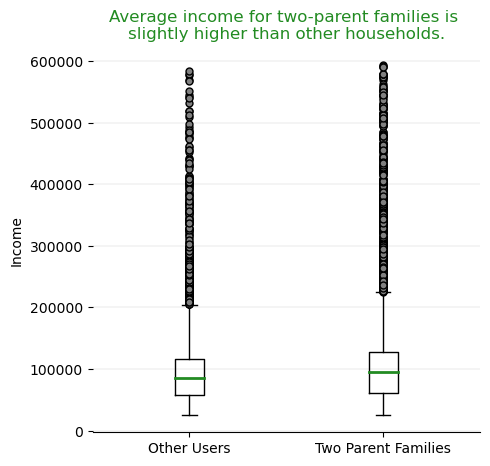

In [58]:
# Create a box-and-whiskers plot of incomes, grouped by profile
fig, ax = plt.subplots(figsize=(5, 5))

# Remove top and side borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add major gridlines in the y-axis
ax.grid(color='grey', 
        axis='y', 
        linestyle='-', 
        linewidth=0.25, 
        alpha=0.5)

#Adjust the look of the boxplot
flierprops = dict(marker='.', 
                  markerfacecolor='grey', 
                  markersize=10, 
                  linestyle='none')
medianprops = dict(linestyle='-', 
                   linewidth=2, 
                   color='forestgreen')

# Set plot title
ax.set_title('Average income for two-parent families is \nslightly higher than other households.', 
             color='forestgreen')
ax.set_ylabel('Income')

# Note: labels is defined at the beginning of 0.6

# Create boxplot
income_box = ax.boxplot(dataset, 
                        labels=labels_r,
                        flierprops=flierprops, 
                        medianprops=medianprops)

plt.show()

In [59]:
# Reclaiming space
del income_stats
del income_profile
del income_not_profile
del dataset

#### 0.6.2.B income_groups

In [ ]:
# Create a cross tabulation to show the proportions of the profile
# members in each income_group
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['income_group'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

In [ ]:
# Create a cross tabulation with just the counts
cross_tab = pd.crosstab(index=df_user_subset['income_group'],
                       columns=df_user_subset['profile_flag'])

cross_tab

In [ ]:
#Confirming counts of cross tab look correct
df_user_subset['income_group'].value_counts()

The sum of each income_group row in the crosstab matches the counts of that income_group in the subset

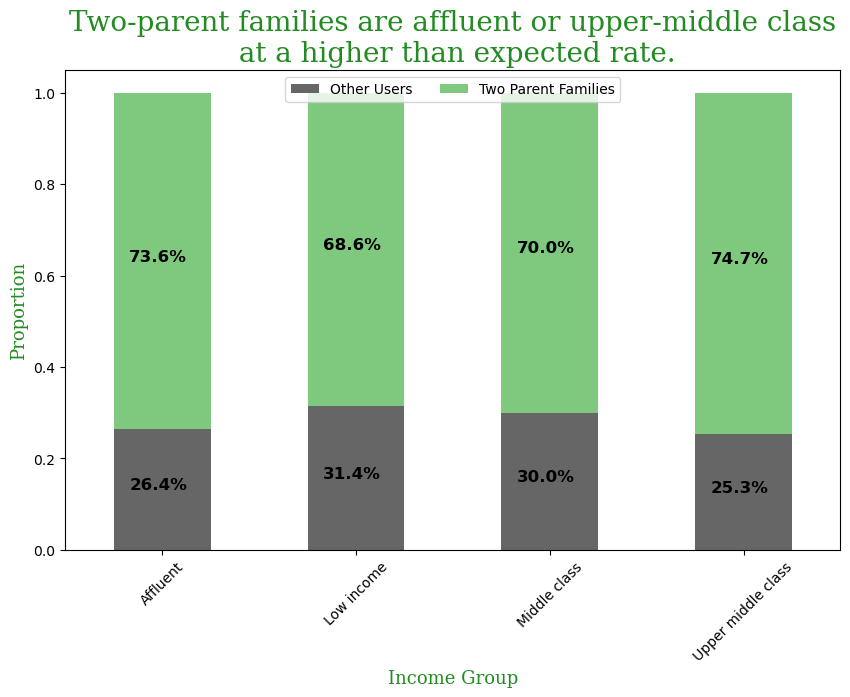

In [63]:
# Create a stacked column plot showing the proportion 
# of senior_citizens in each income_group.

inc_groups_plot = cross_tab_prop_groups.plot(kind='bar',
                   stacked=True,
                   figsize=(10,8),
                   colormap='Accent_r', 
                   order=['Affluent', 'Upper middle class', 'Middle class', 'Low income'])

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.legend(loc='upper center', ncol=2)
plt.xticks(rotation = 45)
plt.xlabel('Income Group', fontdict=font_sm_label)
plt.ylabel('Proportion', fontdict=font_sm_label)
plt.title('Two-parent families are affluent or upper-middle class\n at a higher than expected rate.',
         fontdict=font_title)

#Create a loop to add the percentages to the plot
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_groups.loc[x],
                                   cross_tab_prop_groups.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
plt.show()

In [64]:
# Create filename for export
filename = profile+'_income_groups_bar.png'

In [65]:
filename

'two_parent_fam_income_groups_bar.png'

In [66]:
# Exporting bar chart
inc_groups_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [67]:
# Reclaiming space
del cross_tab
del cross_tab_prop_groups

#### 0.6.2.C gender

In [68]:
# Create a cross tabulation to show the proportions of the profile
# members in each gender
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['gender'],
                            normalize='index')
cross_tab_prop_groups

gender,Female,Male
profile_flag,,
Other Users,0.50,0.50
Two Parent Families,0.50,0.50


Since it appears that both the profile group and not-profile group are split 50-50 across genders, this does not warrant a visualization. 

In [69]:
# Reclaiming space
del cross_tab_prop_groups

#### 0.6.2.D region

In [70]:
# Create a cross tabulation to show the proportions of the profile
# members in each region
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['region'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Two Parent Families
region,,
Midwest,0.30,0.70
Northeast,0.30,0.70
South,0.30,0.70
West,0.30,0.70


In [71]:
# Create a cross tabulation to show the proportions of the profile
# members in each region
cross_tab_prop_groups2 = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['region'],
                            normalize='index')
cross_tab_prop_groups2

region,Midwest,Northeast,South,West
profile_flag,,,,
Other Users,0.23,0.18,0.33,0.26
Two Parent Families,0.24,0.18,0.33,0.25


There is not a significant difference by region for where the profile group is located

In [72]:
#Reclaiming space
del cross_tab_prop_groups
del cross_tab_prop_groups2

#### 0.6.2.E fam_status

In [73]:
# Create a cross tabulation to show the proportions of the profile
# members by fam_status
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['fam_status'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Two Parent Families
fam_status,,
divorced/widowed,1.00,0.00
living with parents and siblings,1.00,0.00
married,0.00,1.00
single,1.00,0.00


#### 0.6.2.F n_dependants

In [74]:
# Create a cross tabulation to show the proportions of the profile
# members with n_dependants
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['n_dependants'],
                            normalize='index')
cross_tab_prop_groups

n_dependants,0,1,2,3
profile_flag,,,,
Other Users,0.84,0.05,0.05,0.05
Two Parent Families,0.00,0.33,0.33,0.33


Two parent families are evenly split between having 1, 2, or 3 children.
Of all other households, only 15% have children, and they are also evenly split between having 1, 2, or 3 children.  This does not seem to warrent a visualization.

In [75]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.G pet_owner

In [76]:
# Create a cross tabulation to show the proportions of the profile
# members who also own pets
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['pet_owner'],
                            normalize='index')
cross_tab_prop_groups

pet_owner,False,True
profile_flag,,
Other Users,0.93,0.07
Two Parent Families,0.93,0.07


Since there is no difference in the percentage of pet_owners based on whether someone is a senior or not, there is no reason to do a visualization.

In [77]:
# Reclaim space
del cross_tab_prop_groups

### 0.6.3 what we know about their shopping habits

#### 0.6.2.A loyalty_flag (based on max_order)

In [78]:
# Create a cross tabulation to show the proportions of the profile
# members with loyalty_flag
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['loyalty_flag'],
                            normalize='index')
cross_tab_prop_groups

loyalty_flag,Loyal customer,New customer,Regular customer
profile_flag,,,
Other Users,0.08,0.54,0.37
Two Parent Families,0.08,0.54,0.37


Since there is no difference in the loyalty_flag based on whether someone is in this profile or note, there is no reason to do a visualization. 

In [79]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.B low_activity_flag

In [80]:
# Create a cross tabulation to show the proportions of the profile
# members with loyalty_flag
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['low_activity_flag'],
                            normalize='index')
cross_tab_prop_groups

low_activity_flag,False,True
profile_flag,,
Other Users,0.79,0.21
Two Parent Families,0.79,0.21


Since there is no difference in the percentage of low_activity_flags based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [81]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.C spender_type (based on mean_spending)

In [82]:
# Create a cross tabulation to show the proportions of the profile
# members with spender_type
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['spender_type'],
                            normalize='index')
cross_tab_prop_groups

spender_type,High spender,Low spender
profile_flag,,
Other Users,0.02,0.98
Two Parent Families,0.02,0.98


Since there is no difference in the percentage of spender_type based on whether someone is a in this profile or not, there is no reason to do a visualization. 

In [83]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.D frequent_shopper (based on median_days_since_ordering)

In [84]:
# Create a cross tabulation to show the proportions of the profile
# members with frequent_shopper
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['frequent_shopper'],
                            normalize='index')
cross_tab_prop_groups

frequent_shopper,Frequent customer,Non-frequent customer,Regular customer
profile_flag,,,
Other Users,0.41,0.27,0.31
Two Parent Families,0.41,0.28,0.31


Since there is minimal difference in the percentage of different frequent_shopper flags based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [85]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.E order_day_of_week

In [86]:
# Create a cross tabulation to show the proportions of the profile
# members with order_day_of_week
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['order_day_of_week'],
                            normalize='index')
cross_tab_prop_groups

order_day_of_week,0,1,2,3,4,5,6
two_parent_fam,,,,,,,
False,0.19,0.18,0.13,0.12,0.12,0.13,0.14
True,0.19,0.17,0.13,0.12,0.12,0.13,0.14


Since there is minimal difference in the day of the week when a user orders based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [87]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.F order_hour_of_day

In [88]:
# Create a cross tabulation to show the proportions of the profile
# members with order_hour_of_day
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['order_hour_of_day'],
                            normalize='index')
cross_tab_prop_groups

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
two_parent_fam,,,,,,,,,,,,,,,,,,,,,
False,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.05,0.08,...,0.08,0.08,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.01
True,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.05,0.08,...,0.08,0.08,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.01


In [89]:
# Transpose the data to allow for easier examination
cross_tab_prop_groups.transpose()

two_parent_fam,False,True
order_hour_of_day,,
0,0.01,0.01
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.01,0.01
7,0.03,0.03
8,0.05,0.05


Since there is no difference in the hour of day when a user orders based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [90]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.G most popular departments by number of items

In [91]:
# Create a cross tabulation to show the proportions of the profile
# members with department_id to see which departments sold the most items
# for the profile and not-profile groups.
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['department_id'],
                            normalize='index')
cross_tab_prop_groups

department_id,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,...,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00
two_parent_fam,,,,,,,,,,,,,,,,,,,,,
False,0.07,0.00,0.04,0.29,0.00,0.01,0.08,0.00,0.03,0.00,...,0.02,0.06,0.02,0.03,0.17,0.02,0.01,0.09,0.03,0.00
True,0.07,0.00,0.04,0.29,0.00,0.01,0.08,0.00,0.03,0.00,...,0.02,0.06,0.02,0.03,0.17,0.02,0.01,0.09,0.03,0.00


In [92]:
cross_tab_prop_groups.transpose()

two_parent_fam,False,True
department_id,,
1.00,0.07,0.07
2.00,0.00,0.00
3.00,0.04,0.04
4.00,0.29,0.29
5.00,0.00,0.00
6.00,0.01,0.01
7.00,0.08,0.08
8.00,0.00,0.00
9.00,0.03,0.03


Since there is no difference in which departments a user orders from based on whether someone is in this profile or not, there is no reason to do a visualization.

In [93]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.H most popular departments by amount spent

In [95]:
# Create a temporary dataframe to hold the spending by profile for each dept
temp = df.groupby(['department_id', profile]).price.sum()

In [96]:
profile_spend_by_dept = pd.DataFrame(temp)

In [97]:
profile_spend_by_dept.shape

(42, 1)

In [98]:
profile_spend_by_dept.head()

price
department_id two_parent_fam              
1.00          False           5,149,296.50
              True           12,139,910.00
2.00          False              77,137.10
              True              176,570.91
3.00          False           2,748,921.00

In [99]:
# Rename column for clarity
profile_spend_by_dept.rename(columns={'price':'total_spent'}, inplace=True)

In [100]:
# Reset the index so that the correct column headers will appear
profile_spend_by_dept = pd.DataFrame(profile_spend_by_dept).reset_index()

In [101]:
profile_spend_by_dept.head()

,department_id,two_parent_fam,total_spent
0,1.00,False,"5,149,296.50"
1,1.00,True,"12,139,910.00"
2,2.00,False,"77,137.10"
3,2.00,True,"176,570.91"
4,3.00,False,"2,748,921.00"


In [102]:
# Adding a column with profile-specific labels for clarity in the viz
profile_spend_by_dept.loc[profile_spend_by_dept[profile] == True, 'profile_flag'] = profile_label
profile_spend_by_dept.loc[profile_spend_by_dept[profile] == False, 'profile_flag'] = not_profile_label

In [103]:
profile_spend_by_dept.head()

,department_id,two_parent_fam,total_spent,profile_flag
0,1.00,False,"5,149,296.50",Other Users
1,1.00,True,"12,139,910.00",Two Parent Families
2,2.00,False,"77,137.10",Other Users
3,2.00,True,"176,570.91",Two Parent Families
4,3.00,False,"2,748,921.00",Other Users


In [104]:
# Drop the unnecessary column
profile_spend_by_dept = profile_spend_by_dept.drop(columns=profile)

In [105]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag
0,1.00,"5,149,296.50",Other Users
1,1.00,"12,139,910.00",Two Parent Families
2,2.00,"77,137.10",Other Users
3,2.00,"176,570.91",Two Parent Families
4,3.00,"2,748,921.00",Other Users


In [106]:
# Adjusting department_id datatype to match that of dept_data
profile_spend_by_dept['department_id'] = profile_spend_by_dept['department_id'].astype('int8')

In [107]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag
0,1,"5,149,296.50",Other Users
1,1,"12,139,910.00",Two Parent Families
2,2,"77,137.10",Other Users
3,2,"176,570.91",Two Parent Families
4,3,"2,748,921.00",Other Users


In [108]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,"17,289,206.00",7.74,1180461,1.89,4006
1,other,2,36291,"253,708.00",6.99,35056,1.04,548
2,bakery,3,1172428,"9,208,026.00",7.85,878658,1.33,1515
3,produce,4,9479291,"75,660,936.00",7.98,2409320,3.93,1684
4,alcohol,5,153696,"1,251,654.25",8.14,84689,1.81,1054


In [109]:
# Merge total_spent_in_dept from dept_data with this df
profile_spend_by_dept = profile_spend_by_dept.merge(dept_data[['department_id','total_spent_in_dept']], on=['department_id'], how='left')

In [110]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag,total_spent_in_dept
0,1,"5,149,296.50",Other Users,"17,289,206.00"
1,1,"12,139,910.00",Two Parent Families,"17,289,206.00"
2,2,"77,137.10",Other Users,"253,708.00"
3,2,"176,570.91",Two Parent Families,"253,708.00"
4,3,"2,748,921.00",Other Users,"9,208,026.00"


In [111]:
# Add a column for percent_of_total_dept_sales
profile_spend_by_dept['percent_of_total_dept_sales'] = profile_spend_by_dept['total_spent']/profile_spend_by_dept['total_spent_in_dept']

In [113]:
profile_spend_by_dept

,department_id,total_spent,profile_flag,total_spent_in_dept,percent_of_total_dept_sales
0,1,"5,149,296.50",Other Users,"17,289,206.00",0.30
1,1,"12,139,910.00",Two Parent Families,"17,289,206.00",0.70
2,2,"77,137.10",Other Users,"253,708.00",0.30
3,2,"176,570.91",Two Parent Families,"253,708.00",0.70
4,3,"2,748,921.00",Other Users,"9,208,026.00",0.30
5,3,"6,459,105.00",Two Parent Families,"9,208,026.00",0.70
6,4,"22,579,622.00",Other Users,"75,660,936.00",0.30
7,4,"53,081,312.00",Two Parent Families,"75,660,936.00",0.70
8,5,"386,153.69",Other Users,"1,251,654.25",0.31
9,5,"865,500.62",Two Parent Families,"1,251,654.25",0.69


There is no significant difference in sales by departments based on whether a user is part of a two-parent household or not -- it consistently ranges between 0.69-71 which is inline with the percentage of two-parent families among our user base.  Thus, there is no reason to do a visualization.